In [1]:
from firedrake import *
from pyroteus import *
from pyroteus_adjoint import *
import matplotlib.pyplot as plt
from movement import *
%matplotlib inline

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


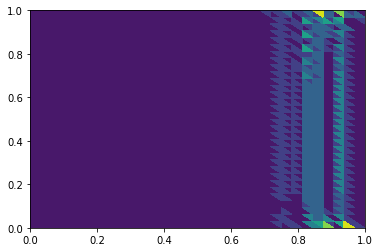

In [2]:
arr = np.fromfile("temp_arr")
n = 32
mesh = UnitSquareMesh(n, n, diagonal="left")
P0 = FunctionSpace(mesh, "DG", 0)
P1_vec = VectorFunctionSpace(mesh, "CG", 1)
P1_ten = TensorFunctionSpace(mesh, "CG", 1)
small_mesh = UnitSquareMesh(n//2, n//2, diagonal="left")
P0_small = FunctionSpace(small_mesh, "DG", 0)

m = Function(P0, val=arr)
tricontourf(m)

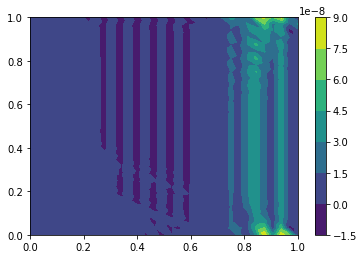

In [3]:
P1 = FunctionSpace(mesh, "CG", 1)
m_P1 = Function(P1)
m_P1.project(m)
tc = tricontourf(m_P1)
plt.colorbar(tc)
# Let's try smoothing it? we don't exactly want negative values either

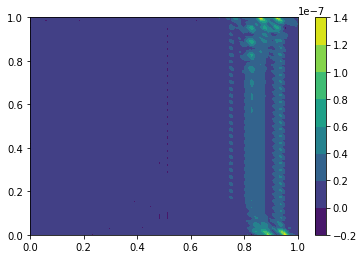

In [4]:
P2 = FunctionSpace(mesh, "CG", 2)
m_P2 = Function(P2)
m_P2.project(m)
tc = tricontourf(m_P2)
plt.colorbar(tc)

In [14]:
dt = 0.03125
dx = 0.001
N = 1
K = Constant(N * dx**2 / dt)
v = TestFunction(m_P2.function_space())
smooth_P2 = Function(m_P2.function_space())
n = FacetNormal(mesh)
# print(type(K * inner(grad(smooth_P2), grad(v)) * dx))
a = inner((smooth_P2 - m_P2) / dt, v) * dx
L = - K * inner(div(grad(m_P2)), v) * dx
bcs = []
print(type(F))
solve(a == L, smooth_P2, bcs=bcs)
tc = tricontourf(smooth_P1)
plt.colorbar(tc)

NameError: name 'F' is not defined

In [24]:
print(type(Constant(0.0) + 1))
print(type(ufl.algebra.Sum(m_P2, 0)))

def monitor(mesh):
    x, y = SpatialCoordinate(mesh)
    # Create UFL sum and return it?
    return (Constant(0.0) + Sum(m_P2.at((x, y))))
print(type(monitor(small_mesh)))

<class 'ufl.algebra.Sum'>
<class 'firedrake.function.Function'>


NameError: name 'Sum' is not defined

In [22]:
def ring_monitor(mesh):
    alpha = Constant(20.0)  # amplitude
    beta = Constant(200.0)  # width
    gamma = Constant(0.15)  # radius
    x, y = SpatialCoordinate(mesh)
    r = (x - 0.5)**2 + (y - 0.5)**2
    print(type(Constant(1.0) + alpha/cosh(beta*(r - gamma))**2))
    return Constant(1.0) + alpha/cosh(beta*(r - gamma))**2


mover = MongeAmpereMover(small_mesh, ring_monitor, method="quasi_newton", maxiter=150)

<class 'ufl.algebra.Sum'>


In [57]:
mover.move();

   0   Min/Max 1.8910e-01   Residual 6.6782e-01   Equidistribution 9.8970e-01
   1   Min/Max 1.0508e-01   Residual 6.1263e-01   Equidistribution 9.8411e-01
   2   Min/Max 1.8281e-01   Residual 3.7570e-01   Equidistribution 9.9045e-01
   3   Min/Max 1.5575e-01   Residual 3.0622e-01   Equidistribution 9.8833e-01
   4   Min/Max 1.7737e-01   Residual 2.8648e-01   Equidistribution 9.8993e-01
   5   Min/Max 1.3262e-01   Residual 2.1641e-01   Equidistribution 9.9227e-01
   6   Min/Max 5.5588e-02   Residual 1.6491e-01   Equidistribution 9.9247e-01
   7   Min/Max 4.9863e-02   Residual 1.3819e-01   Equidistribution 9.9107e-01
   8   Min/Max 8.1888e-02   Residual 1.2383e-01   Equidistribution 9.9206e-01
   9   Min/Max 1.0346e-01   Residual 1.0255e-01   Equidistribution 9.9095e-01
  10   Min/Max 1.2950e-01   Residual 7.7517e-02   Equidistribution 9.9167e-01
  11   Min/Max 1.2745e-01   Residual 6.7289e-02   Equidistribution 9.9143e-01
  12   Min/Max 1.0011e-01   Residual 5.5747e-02   Equidistributi

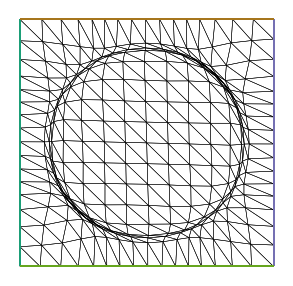

In [58]:
def plot_mesh(mesh, fig=None, axes=None, **kwargs):
    kwargs.setdefault("interior_kw", {"linewidth": 0.5})
    kwargs.setdefault("boundary_kw", {"linewidth": 2.0})
    if fig is None and axes is None:
        fig, axes = plt.subplots(figsize=(5, 5))
    tp = triplot(mesh, axes=axes, **kwargs)
    axes.axis(False)
    return fig, axes, tp
plot_mesh(mover.mesh);